<a href="https://colab.research.google.com/github/Nandusasikumar1/amazon-review-classification-/blob/main/amazonclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project description

* # Rating prediction using  amazon food review dataset
* #### The dataset contains reviews by customers who purchased food  prodcuts from amazon and their corresponding rating.We will use this data to create a supervised classification model to predict the rating based on the customer review.Nltk is used for preparing the dataset for training and Vectorizing the text data .
* ### Libraies used
* scikit-learn
* pandas
* matplotlib
* seaborn
*nltk

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [ ]:
# reading the csv file
df=pd.read_csv('amazonFood.csv')

In [ ]:
df

,ProductId,UserId,productName,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...
41705,B007IVE938,A3MDETK0D5UAIN,"Ajika Organic Rose Buds, 1.6-Ounce",1,Not what I expected.,I certainly could do better by these if I just...
41706,B00125NESM,AGGS9IPJDU6ML,"JOHN BOOS FBLG7224 Table,Stainless,Shelf,72""x24""",5,Great!!,Table is 35 inches in height. It is heavy dut...
41707,B003M5W8ZK,A373MY0PQL9R41,Green Mountain Coffee - Unsweetened Black Iced...,5,Black tea v Coca Cola,I have been one of those people that always fe...
41708,B003M5W8ZK,A3U2QUKGA7CJOP,Green Mountain Coffee - Unsweetened Black Iced...,1,Never Received the product,I was charged for this product by Liquid Natio...


In [ ]:

df.columns

Index(['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text'], dtype='object')

### Dropping irrelevant columns

In [ ]:
df.drop(['ProductId', 'UserId','productName','Summary'],axis=1,inplace=True)

In [ ]:
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
41705,1,I certainly could do better by these if I just...
41706,5,Table is 35 inches in height. It is heavy dut...
41707,5,I have been one of those people that always fe...
41708,1,I was charged for this product by Liquid Natio...


## Renaming column

In [ ]:
df.rename(columns={'Score':'Rating'},inplace=True)

## Checking the datatype of columns

In [ ]:
df.dtypes

Rating     int64
Text      object
dtype: object

## Checking null values in each columns

In [ ]:

df.isna().sum()

Rating    0
Text      0
dtype: int64

## Removing duplicate rows

In [ ]:
df.drop_duplicates(inplace=True,keep='first')

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,Rating,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
39360,1,I certainly could do better by these if I just...
39361,5,Table is 35 inches in height. It is heavy dut...
39362,5,I have been one of those people that always fe...
39363,1,I was charged for this product by Liquid Natio...


## Text cleaning

-  Remove special characters
-  Tokenize the text
-  Remove words with no meaning
-  Remove stop words(Words which are not useful for prediction)
-  Lemmatizing thewords for converting each word to its base form

In [ ]:
def clean(df):
    df['Text']=df['Text'].apply(lambda x: re.sub('[^A-Za-z]', ' ', str(x)).lower())
    df['Text'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

    correct_words =[i.lower() for i in  words.words()]

    cleaned_words = [set(i).intersection(correct_words) for i in df['Text']]


    df['unique_text']=[[i for i in text if i in clean_words ]for text,clean_words in zip(df['Text'],cleaned_words)]
    df['words_with_meaning'] = [[i for i in text if i in unique ]for text,unique in zip(df['Text'],df['unique_text'])]

    Stopwords=stopwords.words('english')
    df['Text']=df['Text'].apply(lambda x:[i for i in x if i not in Stopwords])

    df.drop(['Text','unique_text'],axis=1,inplace=True)

    lemmatizer=WordNetLemmatizer()
    df['words_with_meaning']=df['words_with_meaning'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

In [ ]:
clean(df)
df

,Rating,words_with_meaning
0,5,"[i, have, bought, several, of, the, vitality, ..."
1,1,"[product, a, jumbo, salted, the, were, actuall..."
2,4,"[this, is, a, confection, that, been, around, ..."
3,2,"[if, you, are, looking, for, the, secret, ingr..."
4,5,"[great, taffy, at, a, great, price, there, wa,..."
...,...,...
39360,1,"[i, certainly, could, do, better, by, these, i..."
39361,5,"[table, is, in, height, it, is, heavy, duty, a..."
39362,5,"[i, have, been, one, of, those, people, that, ..."
39363,1,"[i, wa, for, this, product, by, liquid, nation..."


In [ ]:
#creating a new column which stores text representation of list of strings in words_with_meaning column
df['text']=df['words_with_meaning'].apply(lambda x:' '.join(x))

In [ ]:
df

,Rating,words_with_meaning,text
0,5,"[i, have, bought, several, of, the, vitality, ...",i have bought several of the vitality canned d...
1,1,"[product, a, jumbo, salted, the, were, actuall...",product a jumbo salted the were actually small...
2,4,"[this, is, a, confection, that, been, around, ...",this is a confection that been around a few it...
3,2,"[if, you, are, looking, for, the, secret, ingr...",if you are looking for the secret ingredient i...
4,5,"[great, taffy, at, a, great, price, there, wa,...",great taffy at a great price there wa a wide a...
...,...,...,...
39360,1,"[i, certainly, could, do, better, by, these, i...",i certainly could do better by these if i just...
39361,5,"[table, is, in, height, it, is, heavy, duty, a...",table is in height it is heavy duty and rough ...
39362,5,"[i, have, been, one, of, those, people, that, ...",i have been one of those people that always fe...
39363,1,"[i, wa, for, this, product, by, liquid, nation...",i wa for this product by liquid nation and nev...


## Calculating the frequency of Ratings

In [ ]:
rating_count=df['Rating'].value_counts()

In [ ]:
rating_count_normalized=df['Rating'].value_counts(normalize=True)*100

In [ ]:
print('frequency of targret variable(rating) : \n\n',rating_count,'\n\n')
print('percentage of fequency of target variables : \n\n',rating_count_normalized)

frequency of targret variable(rating) : 

 5    24676
4     5704
1     3624
3     3159
2     2202
Name: Rating, dtype: int64 


percentage of fequency of target variables : 

 5    62.685126
4    14.490029
1     9.206148
3     8.024895
2     5.593802
Name: Rating, dtype: float64


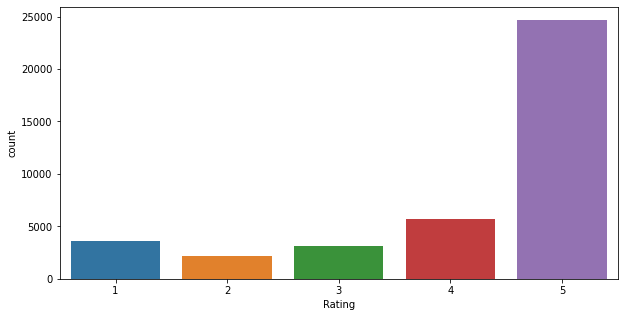

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Rating'])
plt.show()

  
  * #### There is imbalance in the dataset.The rating 5 has high frequency compared to other ratings
  * #### we will assign weights for each class for balancing the dataset
  
  

## Splitting the dataset in train and test sets

In [ ]:
x=df.iloc[:,-1].values
y=df.iloc[:,0].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1,stratify=y)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(27555,) (27555,)
(11810,) (11810,)


## Vectorizing text for training the ml model

In [ ]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

## creating the model

In [ ]:
# calculating the weights for each class in the target variable
from sklearn.utils import class_weight
weights=class_weight.compute_class_weight(class_weight='balanced',classes=df['Rating'].unique(),y=df['Rating'])
weights=dict(zip(df['Rating'].unique(),weights))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight=weights)

In [ ]:
model.fit(x_train,y_train)

## predictions

In [ ]:
model.predict(vectorizer.transform([' taste was really  good but need improvement ']))[0]

4

In [ ]:
model.predict(vectorizer.transform([' taste was really  bad']))[0]

1